## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "anime"
hashtag = "アニメ" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "23-23"
tau = 86
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(86, 'アニメ', 11422)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
アニメ,11421
anime,5170
漫画,2791
イラスト,2360
アニメ好きな人と繋がりたい,1941
...,...
キャラフード,1
roblox,1
PrimeVideoPH!!,1
つな超え,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['roblox', '描きおろし', 'PrimeVideoPH!!', 'doyoung', '4人はそれぞれウソをつく', 'つな超え', 'キャラフード']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
anime,5169
漫画,2790
イラスト,2359
アニメ好きな人と繋がりたい,1940
manga,1856
...,...
キャスト応募は公式Twitterから,1
毎日アニメ,1
Dailyanimation,1
ハーゲンダッツ,1


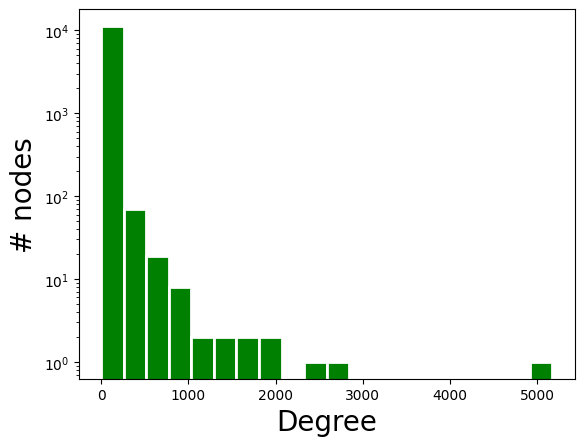

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5855396188776014, 
its standard error sigma: 0.05950424157009088, 
k_min: 78.0


(2.5855396188776014, 0.05950424157009088, 78.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 4.75565492549117e-06.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms lognormal distribution with significance level 0.9746721085889225.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_anime_23-23_86.pdf
../data/figure/degree_distribution/pdfccdf2_anime_23-23_86.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5855396188776014, 
its standard error sigma: 0.05950424157009088, 
k_min: 78.0


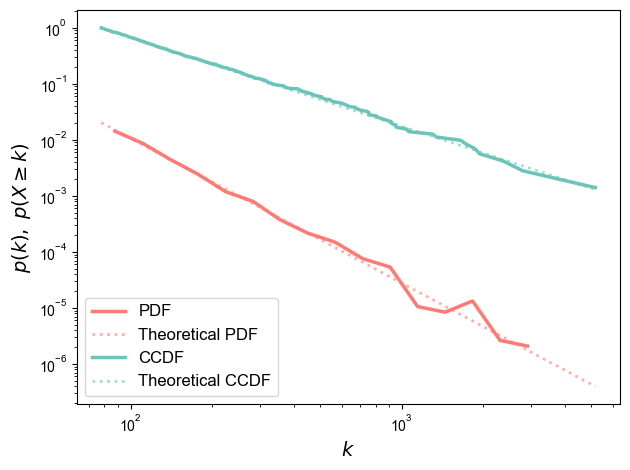

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5855396188776014, 
its standard error sigma: 0.05950424157009088, 
k_min: 78.0


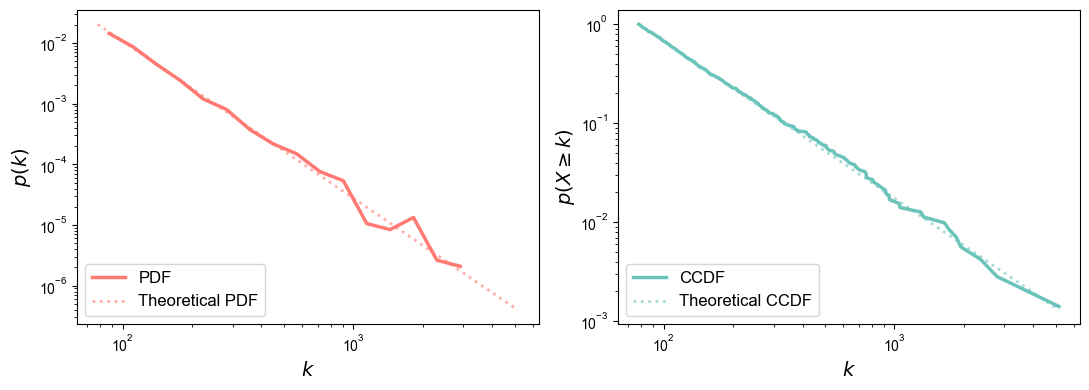

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')